In [351]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from IPython.core.display import clear_output
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [352]:
# load balance sheet into df
balance_sheets = pd.read_csv("balance_sheets.csv")
balance_sheets.head()

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,Symbol
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,16193000000,18149000000,3242000000,3353000000,14460000000,29673000000,45361000000,9000000,576252803,MMM
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,16267000000,18232000000,3181000000,3297000000,14448000000,29236000000,44824000000,9000000,578638253,MMM
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,16819000000,18169000000,3126000000,3330000000,13760000000,29020000000,44255000000,9000000,579675002,MMM
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,17989000000,18783000000,3278000000,3462000000,12867000000,29404000000,43821000000,9000000,577749638,MMM
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,18429000000,19582000000,2840000000,3324000000,11880000000,29570000000,43285000000,9000000,576821878,MMM


In [353]:
# load cash flow into df
cash_flow = pd.read_csv("cash_flow.csv")
cash_flow.head()

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,...,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,Symbol
0,2021-09-30,USD,1874000000,None,None,29000000,166000000,476000000,343000000,-13000000,...,None,None,None,None,-441000000,86000000,1437000000,None,1434000000,MMM
1,2021-06-30,USD,1887000000,None,None,73000000,472000000,472000000,394000000,132000000,...,None,None,None,None,-316000000,187000000,1525000000,29000000,1524000000,MMM
2,2021-03-31,USD,1688000000,None,None,197000000,509000000,460000000,310000000,205000000,...,None,None,None,None,62000000,293000000,2000000,-66000000,1624000000,MMM
3,2020-12-31,USD,2515000000,None,None,286000000,82000000,498000000,422000000,-52000000,...,None,None,None,None,102000000,104000000,1390000000,59000000,1389000000,MMM
4,2020-09-30,USD,2480000000,None,None,94000000,-113000000,481000000,368000000,128000000,...,None,None,None,None,89000000,89000000,1417000000,42000000,1430000000,MMM


In [354]:
# load earnings into df
earnings = pd.read_csv("earnings.csv")
earnings.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,Symbol
0,2021-09-30,2021-10-26,2.45,2.2084,0.2416,10.94,MMM
1,2021-06-30,2021-07-27,2.59,2.2765,0.3135,13.7711,MMM
2,2021-03-31,2021-04-27,2.77,2.2932,0.4768,20.7919,MMM
3,2020-12-31,2021-01-26,2.38,2.1678,0.2122,9.7887,MMM
4,2020-09-30,2020-10-27,2.43,2.2669,0.1631,7.1948,MMM


In [355]:
# load income statements into df
income_statements = pd.read_csv("income_statements.csv")
income_statements.head()

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome,Symbol
0,2021-09-30,USD,4089000000,8942000000,4853000000,4853000000,1788000000,1819000000,482000000,1950000000,...,131000000,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,MMM
1,2021-06-30,USD,4231000000,8950000000,4719000000,4719000000,1971000000,1746000000,514000000,1880000000,...,134000000,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,MMM
2,2021-03-31,USD,4326000000,8851000000,4525000000,4525000000,1994000000,1808000000,524000000,1941000000,...,133000000,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,MMM
3,2020-12-31,USD,4195000000,8583000000,4388000000,4388000000,1849000000,1890000000,456000000,3189000000,...,153000000,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,MMM
4,2020-09-30,USD,4047000000,8350000000,4303000000,4303000000,1909000000,1677000000,461000000,1814000000,...,137000000,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,MMM


In [356]:
# load monthly prices into df
monthly_prices = pd.read_csv("monthly_prices.csv")
monthly_prices.columns = ['Date', 'open', 'high', 'low', 'close', 'volume', 'Symbol']
monthly_prices.head()

,Date,open,high,low,close,volume,Symbol
0,2022-01-21,178.32,181.780,172.5600,172.65,34039389,MMM
1,2021-12-31,172.55,179.180,169.1801,177.63,48251474,MMM
2,2021-11-30,178.53,186.300,169.9400,170.04,47872133,MMM
3,2021-10-29,176.25,183.820,173.7800,178.68,48241875,MMM
4,2021-09-30,194.55,195.606,175.3700,175.42,67366254,MMM


In [385]:
# merge all dataframes together
historical_data = pd.merge(balance_sheets, cash_flow, on = ['Symbol', 'fiscalDateEnding'])
historical_data = pd.merge(historical_data, earnings, on = ['Symbol', 'fiscalDateEnding'])
historical_data = pd.merge(historical_data, income_statements, on = ['Symbol', 'fiscalDateEnding'])
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,None,131000000,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,None,134000000,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,None,133000000,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,None,153000000,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,None,137000000,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,None,25000000,431000000,350000000,50000000,80000000,31000000,481000000,506000000,81000000
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,None,26000000,415000000,117000000,43000000,296000000,385000000,458000000,484000000,298000000
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,None,24000000,345000000,98000000,41000000,247000000,257000000,386000000,410000000,247000000
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,None,25000000,336000000,98000000,41000000,239000000,284000000,377000000,402000000,238000000


In [386]:
historical_data['nextQuarterPrice'] = np.nan
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,nextQuarterPrice
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,131000000,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,NaN
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,134000000,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,NaN
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,133000000,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,NaN
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,153000000,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,NaN
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,137000000,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,25000000,431000000,350000000,50000000,80000000,31000000,481000000,506000000,81000000,NaN
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,26000000,415000000,117000000,43000000,296000000,385000000,458000000,484000000,298000000,NaN
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,24000000,345000000,98000000,41000000,247000000,257000000,386000000,410000000,247000000,NaN
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,25000000,336000000,98000000,41000000,239000000,284000000,377000000,402000000,238000000,NaN


In [387]:
historical_data['currentQuarterPrice'] = np.nan
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,nextQuarterPrice,currentQuarterPrice
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,NaN,NaN
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,NaN,NaN
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,NaN,NaN
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,NaN,NaN
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,431000000,350000000,50000000,80000000,31000000,481000000,506000000,81000000,NaN,NaN
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,415000000,117000000,43000000,296000000,385000000,458000000,484000000,298000000,NaN,NaN
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,345000000,98000000,41000000,247000000,257000000,386000000,410000000,247000000,NaN,NaN
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,336000000,98000000,41000000,239000000,284000000,377000000,402000000,238000000,NaN,NaN


In [388]:
historical_data['prevPercentChange'] = np.nan
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,nextQuarterPrice,currentQuarterPrice,prevPercentChange
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,NaN,NaN,NaN
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,NaN,NaN,NaN
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,NaN,NaN,NaN
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,NaN,NaN,NaN
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,350000000,50000000,80000000,31000000,481000000,506000000,81000000,NaN,NaN,NaN
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,117000000,43000000,296000000,385000000,458000000,484000000,298000000,NaN,NaN,NaN
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,98000000,41000000,247000000,257000000,386000000,410000000,247000000,NaN,NaN,NaN
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,98000000,41000000,239000000,284000000,377000000,402000000,238000000,NaN,NaN,NaN


In [389]:
# get all tickers and quarterly dates
tickers = historical_data['Symbol'].unique()
quarterlyDates = historical_data[['fiscalDateEnding', 'Symbol']]
quarterlyDates

,fiscalDateEnding,Symbol
0,2021-09-30,MMM
1,2021-06-30,MMM
2,2021-03-31,MMM
3,2020-12-31,MMM
4,2020-09-30,MMM
...,...,...
9164,2017-12-31,ZTS
9165,2017-09-30,ZTS
9166,2017-06-30,ZTS
9167,2017-03-31,ZTS


In [17]:
test = quarterlyDates[(quarterlyDates['fiscalDateEnding'] > '2021-06-30') & (quarterlyDates['Symbol'] == 'MMM')]
historical_data.iloc[0]['fiscalDateEnding']
monthly_prices[(monthly_prices['Date'] == '2021-09-30') & (monthly_prices['Symbol'] == "MMM")].iloc[0]['close']
historical_data.iloc[9]['nextQuarterPrice']
historical_data.at[9, 'nextQuarterPrice'] = 1
historical_data.iloc[9]['nextQuarterPrice']
len(historical_data)

9169

In [18]:
# get current quarter prices, add to dataframe
for i in range(len(historical_data)):
    #print(i)
    date = historical_data.iloc[i]['fiscalDateEnding']
    sym = historical_data.iloc[i]['Symbol']
    company_price = monthly_prices[(monthly_prices['Date'] == date) & (monthly_prices['Symbol'] == sym)]
    year_month = date[:7]
    if len(company_price) == 0:
        company_price = monthly_prices[monthly_prices['Symbol'] == sym]
        company_price = company_price[company_price['Date'].str.contains(year_month, regex = False) == True]
        if len(company_price) == 0:
            month = year_month[5:]
            year = year_month[:4]
            if month[0] == '0':
                month = month[1]
            while len(company_price) == 0:
                month = int(month) + 1
                if month > 12:
                    year = int(year) + 1
                    month = 1
                if len(str(month)) == 1:
                    month = '0' + str(month)
                year_month = str(year) + '-' + str(month)
                #print(year_month)
                company_price = monthly_prices[monthly_prices['Symbol'] == sym]
                company_price = company_price[company_price['Date'].str.contains(year_month, regex = False) == True]
    historical_data.at[i, 'currentQuarterPrice'] = company_price.iloc[0]['close']
    #clear_output(wait = True)

In [390]:
for i in (historical_data.index):
    date = historical_data.loc[i]['fiscalDateEnding']
    sym = historical_data.loc[i]['Symbol']
    year_month = date[:7]
    company_price = monthly_prices[(monthly_prices['Symbol'] == sym)]
    backup = company_price
    company_price = company_price[company_price['Date'].str.contains(year_month, regex = False) == True]
    if len(company_price) == 0:
        #backup = backup[backup['Date'] == min(backup['Date'])]
        #historical_data.at[i, 'currentQuarterPrice'] = backup.iloc[0]['close']
        historical_data = historical_data.drop([i])
        #continue
    else:
        company_price = company_price[company_price['Date'] == max(company_price['Date'])]
        historical_data.at[i, 'currentQuarterPrice'] = company_price.iloc[0]['close']

In [414]:
historical_data = historical_data.drop('prevPercentChange', axis = 1)
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,nextQuarterPrice,currentQuarterPrice
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,177.63,175.42
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,175.42,198.63
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,198.63,192.68
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,192.68,174.79
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,174.79,160.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,431000000,350000000,50000000,80000000,31000000,481000000,506000000,81000000,83.51,72.04
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,415000000,117000000,43000000,296000000,385000000,458000000,484000000,298000000,72.04,63.76
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,345000000,98000000,41000000,247000000,257000000,386000000,410000000,247000000,63.76,62.38
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,336000000,98000000,41000000,239000000,284000000,377000000,402000000,238000000,62.38,53.37


In [19]:
# get next quarter prices, add to dataframe
for i in range(len(historical_data)):
    print(i)
    date = historical_data.iloc[i]['fiscalDateEnding']
    #year_month = date[:7]
    sym = historical_data.iloc[i]['Symbol']
    #print(i, sym, date, year_month)
    nextQuarter = quarterlyDates[(quarterlyDates['fiscalDateEnding'] > date) & (quarterlyDates['Symbol'] == sym)]
    #print(i, nextQuarter)
    if len(nextQuarter) == 0:
        continue
    nextQuarter = nextQuarter[nextQuarter['fiscalDateEnding'] == min(nextQuarter['fiscalDateEnding'])].iloc[0]['fiscalDateEnding']
    year_month = nextQuarter[0:7]
    price = monthly_prices[(monthly_prices['Date'] == nextQuarter) & (monthly_prices['Symbol'] == sym)]
    if len(price) == 0:
        company_prices = monthly_prices[monthly_prices['Symbol'] == sym]
        price = company_prices[company_prices['Date'].str.contains(year_month, regex = False) == True]
        if len(price) == 0:
            continue
    historical_data.at[i,'nextQuarterPrice'] = price.iloc[0]['close']
    clear_output(wait = True)
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,nextQuarterPrice,currentQuarterPrice,prevPercentChange
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,NaN,175.42,NaN
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,175.42,198.63,NaN
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,198.63,192.68,NaN
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,192.68,174.79,NaN
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,174.79,160.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,350000000,50000000,80000000,31000000,481000000,506000000,81000000,83.51,72.04,NaN
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,117000000,43000000,296000000,385000000,458000000,484000000,298000000,72.04,63.76,NaN
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,98000000,41000000,247000000,257000000,386000000,410000000,247000000,63.76,62.38,NaN
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,98000000,41000000,239000000,284000000,377000000,402000000,238000000,62.38,53.37,NaN


In [392]:
# fix next quarter price
months = ['03', '06', '09', '12']
for i in (historical_data.index):
    sym = historical_data.loc[i]['Symbol']
    date = historical_data.loc[i]['fiscalDateEnding']
    year = date[:4]
    month = date[5:7]
    day = date[9:]
    test = historical_data[historical_data['Symbol'] == sym]
    company_price = monthly_prices[(monthly_prices['Symbol'] == sym)]
    company_price = company_price[company_price['Date'] > date]
    if month in months:
        idx = months.index(month)
        if idx == len(months) - 1:
            idx = 0
            year = str(int(year) + 1)
        else:
            idx += 1
        year_month = year + '-' + months[idx]
        company_price = company_price[company_price['Date'].str.contains(year_month, regex = False) == True]
        if len(company_price) == 0:
            historical_data = historical_data.drop([i])
        else:
            company_price = company_price[company_price['Date'] == max(company_price['Date'])]
            historical_data.at[i, 'nextQuarterPrice'] = company_price.iloc[0]['close']
    else:
        historical_data = historical_data.drop([i])

In [379]:
index = []
for i in range(len(historical_data)):
    if math.isnan(historical_data.iloc[i]['nextQuarterPrice']):
        index.append(i)
historical_data.iloc[index]

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,currentQuarterPrice,nextQuarterPrice
100,2021-11-30,USD,43674743000,18621652000,5637117000,5644085000,None,10032721000,25053091000,1654065000,...,2377426000,586402000,11183000,1819730000,1503285000,2388609000,2493233000,1791024000,357.40,NaN
101,2021-08-31,USD,43175843000,19666511000,8168174000,8172468000,None,8796992000,23509332000,1639105000,...,1896630000,480382000,12977000,1437423000,1257508000,1909607000,1991417000,1416248000,336.56,NaN
102,2021-05-31,USD,42124884000,21144858000,10009380000,10013813000,None,8637841000,20980026000,1538778000,...,2073855000,524429000,28739000,1569572000,1699107000,2102594000,2196574000,1549426000,282.16,NaN
103,2021-02-28,USD,39985401000,19560720000,9166578000,9170096000,None,7986153000,20424681000,1500781000,...,1741809000,300950000,8922000,1461493000,1509623000,1750731000,1824477000,1440859000,250.90,NaN
104,2020-11-30,USD,38268311000,18626094000,8594003000,8677151000,None,7799770000,19642217000,1506825000,...,1965086000,464810000,8854000,1522057000,1582911000,1973940000,2041147000,1500276000,249.09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,2018-02-28,USD,70816000000,20358000000,1749000000,1749000000,10316000000,7281000000,50458000000,14045000000,...,1852000000,503000000,151000000,1335000000,1729000000,2003000000,2237000000,1349000000,68.89,NaN
8759,2017-11-30,USD,66618000000,19681000000,1830000000,1830000000,10010000000,6858000000,46937000000,13693000000,...,1048000000,227000000,149000000,809000000,1329000000,1197000000,1378000000,821000000,72.76,NaN
8760,2017-08-31,USD,66009000000,19753000000,3301000000,3301000000,8899000000,6528000000,46256000000,13642000000,...,928000000,126000000,193000000,7340000000,1054000000,1121000000,1304000000,802000000,81.50,NaN
8761,2017-05-31,USD,74173000000,28152000000,12253000000,12253000000,8681000000,6339000000,46021000000,13535000000,...,1330000000,168000000,155000000,1186000000,1668000000,1485000000,1666000000,1162000000,81.02,NaN


In [20]:
# try to fill in nan in nextQuarterPrice
for i in range(len(historical_data)):
    if math.isnan(historical_data.iloc[i]['nextQuarterPrice']):
        print(i)
        currentQuarter = historical_data.iloc[i]['fiscalDateEnding']
        #print(i, currentQuarter)
        year = currentQuarter[:4]
        month = currentQuarter[5:7]
        day = currentQuarter[8:]
        if month[0] == '0':
            month = month[1:]
            month = int(month) + 3
            if month > 12:
                month -= 12
                year = int(year) + 1
        newDate = str(year) + "-" + str(month) + "-" + str(day)
        sym = historical_data.iloc[i]['Symbol']
        nextQuarter = monthly_prices[(monthly_prices['Date'] >= newDate) & (monthly_prices['Symbol'] == sym)]
        if len(nextQuarter) == 0:
            continue
        nextQuarter = nextQuarter[nextQuarter['Date'] == min(nextQuarter['Date'])]
        historical_data.at[i,'nextQuarterPrice'] = nextQuarter.iloc[0]['close']
        clear_output(wait = True)
        #print(newDate, nextQuarter.iloc[0]['close'])

9149


In [21]:
# get percent change in stock price from previous quarter to current quarter
for i in range(len(historical_data)):
    current_date = historical_data.iloc[i]['fiscalDateEnding']
    symbol = historical_data.iloc[i]['Symbol']
    #print(symbol)
    prev_quarter = quarterlyDates[(quarterlyDates['fiscalDateEnding'] < current_date) & (quarterlyDates['Symbol'] == symbol)]
    if len(prev_quarter) == 0:
        historical_data.at[i, 'prevPercentChange'] = 0
        continue
    prev_quarter = prev_quarter[prev_quarter['fiscalDateEnding'] == max(prev_quarter['fiscalDateEnding'])].iloc[0]['fiscalDateEnding']
    #print(prev_quarter, current_date)
    year_month = prev_quarter[0:7]
    price = monthly_prices[(monthly_prices['Date'] == prev_quarter) & (monthly_prices['Symbol'] == symbol)]
    #print(historical_data.iloc[i]['currentQuarterPrice'], price.iloc[0]['close'])
    if len(price) == 0:
        company_prices = monthly_prices[monthly_prices['Symbol'] == sym]
        price = company_prices[company_prices['Date'].str.contains(year_month, regex = False) == True]
        if len(price) == 0:
            historical_data.at[i, 'prevPercentChange'] = 0
            continue
    historical_data.at[i, 'prevPercentChange'] = ((historical_data.iloc[i]['currentQuarterPrice'] - price.iloc[0]['close']) / price.iloc[0]['close']) * 100
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,nextQuarterPrice,currentQuarterPrice,prevPercentChange
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,177.63,175.42,-11.685043
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,175.42,198.63,3.088022
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,198.63,192.68,10.235139
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,192.68,174.79,9.120989
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,174.79,160.18,2.686070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,350000000,50000000,80000000,31000000,481000000,506000000,81000000,83.51,72.04,12.986198
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,117000000,43000000,296000000,385000000,458000000,484000000,298000000,72.04,63.76,2.212248
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,98000000,41000000,247000000,257000000,386000000,410000000,247000000,63.76,62.38,16.882144
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,98000000,41000000,239000000,284000000,377000000,402000000,238000000,62.38,53.37,-0.298898


In [394]:
# check for nan values in nextQuarter
count = 0
for i in range(len(historical_data)):
    if math.isnan(historical_data.iloc[i]['nextQuarterPrice']):
        #print(historical_data.iloc[i]['Symbol'])
        count += 1
count

0

In [395]:
# check for nan values in currentQuarter
count = 0
for i in range(len(historical_data)):
    if math.isnan(historical_data.iloc[i]['currentQuarterPrice']):
        #print(historical_data.iloc[i]['Symbol'])
        count += 1
count

0

In [24]:
# get percent change from current quarter to next quarter
historical_data['percentChange'] = ((historical_data['nextQuarterPrice'] - historical_data['currentQuarterPrice']) / historical_data['currentQuarterPrice']) * 100
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,nextQuarterPrice,currentQuarterPrice,prevPercentChange,percentChange
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,177.63,175.42,-11.685043,1.259834
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,175.42,198.63,3.088022,-11.685043
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,198.63,192.68,10.235139,3.088022
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,192.68,174.79,9.120989,10.235139
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,174.79,160.18,2.686070,9.120989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,50000000,80000000,31000000,481000000,506000000,81000000,83.51,72.04,12.986198,15.921710
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,43000000,296000000,385000000,458000000,484000000,298000000,72.04,63.76,2.212248,12.986198
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,41000000,247000000,257000000,386000000,410000000,247000000,63.76,62.38,16.882144,2.212248
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,41000000,239000000,284000000,377000000,402000000,238000000,62.38,53.37,-0.298898,16.882144


In [25]:
# create column for indicator of positive or negative change between quarter price
historical_data['inc_or_dec'] = [1 if x > 0 else 0 if x == 0 else -1 for x in historical_data['percentChange']]
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,nextQuarterPrice,currentQuarterPrice,prevPercentChange,percentChange,inc_or_dec
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,1433000000,1300000000,1875000000,2006000000,1434000000,177.63,175.42,-11.685043,1.259834,1
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,1523000000,1805000000,2060000000,2194000000,1524000000,175.42,198.63,3.088022,-11.685043,-1
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,1626000000,1578000000,2075000000,2208000000,1624000000,198.63,192.68,10.235139,3.088022,1
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,4185000000,1688000000,1846000000,1999000000,1389000000,192.68,174.79,9.120989,10.235139,1
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,1418000000,1745000000,1928000000,2065000000,1430000000,174.79,160.18,2.686070,9.120989,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,80000000,31000000,481000000,506000000,81000000,83.51,72.04,12.986198,15.921710,1
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,296000000,385000000,458000000,484000000,298000000,72.04,63.76,2.212248,12.986198,1
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,247000000,257000000,386000000,410000000,247000000,63.76,62.38,16.882144,2.212248,1
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,239000000,284000000,377000000,402000000,238000000,62.38,53.37,-0.298898,16.882144,1


In [415]:
# get non numeric columns
non_numeric_columns = []
for i in historical_data.columns:
    try:
        float(historical_data[i].iloc[0])
    except:
        non_numeric_columns.append(i)
non_numeric_columns

['fiscalDateEnding',
 'reportedCurrency_x',
 'longTermInvestments',
 'Symbol',
 'reportedCurrency_y',
 'paymentsForOperatingActivities',
 'proceedsFromOperatingActivities',
 'paymentsForRepurchaseOfPreferredStock',
 'dividendPayoutPreferredStock',
 'proceedsFromIssuanceOfCommonStock',
 'proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet',
 'proceedsFromIssuanceOfPreferredStock',
 'changeInExchangeRate',
 'reportedDate',
 'reportedCurrency',
 'investmentIncomeNet',
 'depreciation']

In [27]:
def replaceNone(df):
    return df.replace("None", np.nan)

In [28]:
# test linear regression model on data
#mmm = historical_data[historical_data['Symbol'] == 'MMM']
#mmm = mmm.apply(replanceNone)
#mmm = mmm.dropna()
#X = mmm.drop(non_numeric_columns, axis = 1)
#X = X.drop(['nextQuarterPrice'], axis = 1)
#Y = mmm['nextQuarterPrice']
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3)
#model = LinearRegression()
#model.fit(X_train, y_train)
#print(y_test)
#model.predict(X_test)
#for i in X.columns:
#    pd.to_numeric(X[i])

In [422]:
correlation = historical_data.drop(non_numeric_columns, axis = 1)
correlation = correlation.replace('None', np.NaN)
correlation = correlation.astype('float64')
imp = SimpleImputer(missing_values = np.NaN, strategy='mean')
newDf = pd.DataFrame(imp.fit_transform(correlation))
newDf.columns = correlation.columns
newDf.index = correlation.index
correlation = newDf
correlation = (correlation - correlation.mean()) / correlation.std()
correlation = correlation.corr()['nextQuarterPrice'].drop(['nextQuarterPrice'])
correlation = correlation[correlation > .1].index
correlation
#len(correlation)

Index(['currentNetReceivables', 'currentAccountsPayable',
       'capitalLeaseObligations', 'totalShareholderEquity', 'commonStock',
       'operatingCashflow', 'depreciationDepletionAndAmortization',
       'capitalExpenditures', 'profitLoss',
       'paymentsForRepurchaseOfCommonStock', 'paymentsForRepurchaseOfEquity',
       'netIncome_x', 'grossProfit', 'totalRevenue', 'costOfRevenue',
       'costofGoodsAndServicesSold', 'sellingGeneralAndAdministrative',
       'researchAndDevelopment', 'operatingExpenses', 'nonInterestIncome',
       'depreciationAndAmortization', 'incomeBeforeTax',
       'netIncomeFromContinuingOperations', 'comprehensiveIncomeNetOfTax',
       'ebit', 'ebitda', 'netIncome_y', 'currentQuarterPrice'],
      dtype='object')

In [147]:
# Linear Regression
df = historical_data
X_training_index = df[df['fiscalDateEnding'] < '2020-09-30'].index
X_testing_index = df[df['fiscalDateEnding'] >= '2020-09-30'].index
y_training_index = df['nextQuarterPrice'][df['fiscalDateEnding'] < '2020-09-30'].index
y_testing_index = df['nextQuarterPrice'][df['fiscalDateEnding'] >= '2020-09-30'].index
currentPrice = df['currentQuarterPrice']
X = df.drop(non_numeric_columns, axis = 1)
X = X.drop(['nextQuarterPrice', 'percentChange', 'inc_or_dec'], axis = 1)
X = X.replace('None', np.NaN)
X = X.astype('float64')
X = (X - X.mean()) / X.std()
X['currentQuarterPrice'] = currentPrice
imp = SimpleImputer(missing_values = np.NaN, strategy='mean')
newDf = pd.DataFrame(imp.fit_transform(X))
newDf.columns = X.columns
newDf.index = X.index
X = newDf
X = X[correlation]
#column_means = X.mean()
#X = X.fillna(column_means)

Y = df['nextQuarterPrice']
#Y = df['percentChange']
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25)
X_train = X.loc[X_training_index]
X_test = X.loc[X_testing_index]
y_train = Y.loc[y_training_index]
y_test = Y.loc[y_testing_index]
model = LinearRegression()
model.fit(X_train, y_train)
#print(y_test)
model.predict(X_test)
X_test

,currentNetReceivables,currentAccountsPayable,capitalLeaseObligations,totalShareholderEquity,commonStock,operatingCashflow,depreciationDepletionAndAmortization,capitalExpenditures,profitLoss,paymentsForRepurchaseOfCommonStock,...,nonInterestIncome,depreciationAndAmortization,incomeBeforeTax,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,currentQuarterPrice,prevPercentChange
0,0.309846,0.111419,-0.238339,-0.055525,-0.215828,0.198840,0.142578,-0.033541,0.361226,0.114855,...,-0.352076,-0.181598,0.421716,0.264483,0.323272,0.234861,0.206911,0.403355,175.42,-0.218423
1,0.322248,0.123689,0.025304,-0.055858,-0.215828,0.201719,0.138275,0.016874,0.402455,0.097535,...,0.435511,-0.176550,0.498584,0.298503,0.563827,0.283944,0.256032,0.447877,198.63,-0.127538
2,0.293475,0.077276,0.027469,-0.074974,-0.215828,0.157645,0.125364,-0.066162,0.450242,-0.098759,...,0.430136,-0.178233,0.500283,0.337437,0.455696,0.287924,0.259689,0.497347,192.68,-0.083568
3,0.274955,0.057893,-0.311501,-0.099786,-0.215828,0.340809,0.166248,0.044553,0.339206,-0.264021,...,0.406521,-0.144575,0.399208,1.304736,0.508094,0.227167,0.205082,0.381093,174.79,-0.090422
4,0.261396,-0.004880,0.019243,-0.127210,-0.215828,0.333057,0.147958,-0.008828,0.359821,-0.265464,...,0.385549,-0.171501,0.439553,0.258813,0.535246,0.248923,0.222327,0.401376,160.18,-0.130010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9149,-0.312564,-0.328704,-0.282496,-0.327287,-0.216284,-0.071588,-0.251205,-0.254971,-0.053401,-0.122574,...,-0.349609,-0.316230,-0.045009,-0.068534,-0.053994,-0.072902,-0.117075,-0.032968,194.14,-0.120852
9150,-0.309588,-0.331905,-0.288124,-0.336428,-0.216284,-0.109683,-0.249053,-0.260902,-0.072609,-0.145667,...,-0.349697,-0.314547,-0.054352,-0.084032,-0.047325,-0.078474,-0.122300,-0.052755,186.36,-0.033713
9151,-0.317029,-0.335995,-0.282929,-0.343680,-0.216284,-0.127623,-0.252281,-0.296489,-0.050590,-0.134842,...,-0.349168,-0.316230,-0.032693,-0.066266,0.016505,-0.064943,-0.109236,-0.029505,157.48,-0.176348
9152,-0.327612,-0.316256,-0.281197,-0.352571,-0.216284,-0.057192,-0.252281,-0.222349,-0.144291,-0.265464,...,-0.349520,-0.314547,-0.146083,-0.141866,-0.122588,-0.135516,-0.178475,-0.128444,165.50,-0.146052


In [148]:
predicted = model.predict(X_test)
new_df = historical_data.loc[X_test.index, ['Symbol', 'currentQuarterPrice', 'nextQuarterPrice']]
new_df['predicted'] = predicted
new_df['percentChangePredicted'] = ((new_df['predicted'] - new_df['currentQuarterPrice']) / new_df['currentQuarterPrice']) * 100
new_df[new_df['percentChangePredicted'] > 5]

,Symbol,currentQuarterPrice,nextQuarterPrice,predicted,percentChangePredicted
60,ABBV,107.87,135.40,114.053000,5.731899
61,ABBV,112.64,107.87,118.861942,5.523741
63,ABBV,107.15,108.22,113.857767,6.260165
64,ABBV,87.59,107.15,91.991334,5.024927
103,ACN,250.90,282.16,263.609968,5.065751
...,...,...,...,...,...
9012,XEL,66.67,66.51,72.142728,8.208681
9013,XEL,69.01,66.67,74.921217,8.565740
9070,YUM,115.03,122.31,121.175962,5.342921
9071,YUM,108.18,115.03,114.253376,5.614139


In [149]:
# metrics for Linear Regression Model
print('MAE: ', metrics.mean_absolute_error(y_test, predicted))
print('MSE: ', metrics.mean_squared_error(y_test, predicted))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE:  19.445837631114685
MSE:  2116.5419150827843
RMSE:  46.00589000424603


In [150]:
def test_buying_algo(historical_data, X_test, predictions, percentage):
    df = historical_data.loc[X_test.index, ['Symbol', 'currentQuarterPrice', 'nextQuarterPrice']]
    df['predicted_price'] = predictions
    df['percentChangePredicted'] = ((df['predicted_price'] - df['currentQuarterPrice']) / df['currentQuarterPrice']) * 100
    df['percentChangeActual'] = ((df['nextQuarterPrice'] - df['currentQuarterPrice']) / df['currentQuarterPrice']) * 100
    df15 = df[df['percentChangePredicted'] > percentage]
    #df15 = df[(df['percentChangePredicted'] > percentage - 1) & (df['percentChangePredicted'] > percentage + 1)]
    if len(df15) == 0:
        print('No significant increase predicted')
        return
    # buy one stock for each company predicted >15% increase
    initial_investment = df15['currentQuarterPrice'].sum()
    next_quarter_total = df15['nextQuarterPrice'].sum()
    profit = next_quarter_total - initial_investment
    percent_change = ((next_quarter_total - initial_investment) / initial_investment) * 100
    predicted_incorrectly = (len(df15[df15['nextQuarterPrice'] < df15['currentQuarterPrice']]) / len(df15)) * 100
    print("Initial Investment:           $%.2f" %(initial_investment))
    print("Next Quarter Portfolio Total: $%.2f" %(next_quarter_total))
    print("Profit:                       $%.2f" %(profit))
    print("Portfolio Percent Change:     %f%%" % percent_change)
    print("Percent of Invested Stocks Incorrectly Predicted: %f%%" % predicted_incorrectly)
    return df15

In [151]:
# test profit if bought one share of all stocks predicted growth greater than 15%
test_buying_algo(historical_data, X_test, predicted, 15)

Initial Investment:           $2484.60
Next Quarter Portfolio Total: $2657.40
Profit:                       $172.80
Portfolio Percent Change:     6.954842%
Percent of Invested Stocks Incorrectly Predicted: 51.063830%


,Symbol,currentQuarterPrice,nextQuarterPrice,predicted_price,percentChangePredicted,percentChangeActual
538,AAL,20.52,17.96,32.702634,59.369561,-12.475634
539,AAL,21.21,20.52,31.455063,48.302985,-3.253182
540,AAL,23.90,21.21,32.666966,36.681866,-11.255230
542,AAL,12.29,15.77,24.940144,102.930380,28.315704
1122,BBWI,32.01,80.07,36.829040,15.054795,150.140581
1383,BMY,59.17,62.35,69.007721,16.626197,5.374345
1386,BMY,62.03,63.13,71.996246,16.066817,1.773335
1504,CZR,112.28,93.53,131.866079,17.443960,-16.699323
1505,CZR,103.75,112.28,122.196892,17.780137,8.221687
1506,CZR,87.45,103.75,105.411503,20.539168,18.639222


In [152]:
# test selling stocks if price is predicted to decrease
test2 = new_df[new_df['percentChangePredicted'] < -20]
potential_profit = (test2['nextQuarterPrice'] - test2['currentQuarterPrice']).sum()
total_invested = test2['currentQuarterPrice'].sum()
potential_revenue = test2['nextQuarterPrice'].sum()
print('Total Invested                    : ', total_invested)
print('Potential Profit/Loss if not sold : ', potential_profit)
print('Potential Revenue if not sold     : ', potential_revenue)
print('Potential Percent change          :', ((potential_revenue - total_invested) / total_invested) * 100)
test2

Total Invested                    :  840.6400000000001
Potential Profit/Loss if not sold :  170.43999999999997
Potential Revenue if not sold     :  1011.08
Potential Percent change          : 20.275028549676428


,Symbol,currentQuarterPrice,nextQuarterPrice,predicted,percentChangePredicted
487,AMCR,11.59,12.01,9.027288,-22.111407
488,AMCR,11.46,11.59,8.355578,-27.089196
489,AMCR,11.68,11.46,8.990483,-23.026689
490,AMCR,11.77,11.68,8.841702,-24.879334
491,AMCR,11.05,11.77,8.146205,-26.278688
942,T,27.01,24.60,20.435350,-24.341541
943,T,28.78,27.01,22.908706,-20.400603
944,T,30.27,28.78,21.303646,-29.621257
946,T,28.51,28.76,18.779131,-34.131423
1066,BKR,20.85,21.61,12.695593,-39.109865


In [424]:
X[correlation].shape

(8557, 28)

In [425]:
# neural network predicting if price will increase next quarter or not
df = historical_data
X_training_index = df[df['fiscalDateEnding'] < '2020-09-30'].index
X_testing_index = df[df['fiscalDateEnding'] >= '2020-09-30'].index
y_training_index = df['nextQuarterPrice'][df['fiscalDateEnding'] < '2020-09-30'].index
y_testing_index = df['nextQuarterPrice'][df['fiscalDateEnding'] >= '2020-09-30'].index
currentPrice = df['currentQuarterPrice']
X = df.drop(non_numeric_columns, axis = 1)
X = X.drop(['nextQuarterPrice'], axis = 1)
X = X.replace('None', np.NaN)
X = X.astype('float64')
X = (X - X.mean()) / X.std()
X['currentQuarterPrice'] = currentPrice
imp = SimpleImputer(missing_values = np.NaN, strategy='mean')
newDf = pd.DataFrame(imp.fit_transform(X))
newDf.columns = X.columns
newDf.index = X.index
X = newDf
X = X[correlation]
# Y = df['inc_or_dec']
Y = df['nextQuarterPrice']
#encoder = LabelEncoder()
#encoder.fit(Y)
#encoded_Y = encoder.transform(Y)
#Y = np_utils.to_categorical(encoded_Y)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25) # SPY fix into consecutive years
X_train = X.loc[X_training_index]
X_test = X.loc[X_testing_index]
y_train = Y.loc[y_training_index]
y_test = Y.loc[y_testing_index]
model = models.Sequential()
model.add(layers.Dense(18, activation='relu', input_shape=(28, )))
model.add(layers.Dense(18, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
# model.add(layers.Dense(1, activation='softmax'))
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']) #softmax #tfidf
model.fit(X_train, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
64/64 [==============================] - 2s 2ms/step - loss: 49262.7500 - mean_absolute_error: 110.5563
Epoch 2/10
64/64 [==============================] - 0s 1ms/step - loss: 4694.9844 - mean_absolute_error: 26.5430
Epoch 3/10
64/64 [==============================] - 0s 1ms/step - loss: 2225.0239 - mean_absolute_error: 16.9452
Epoch 4/10
64/64 [==============================] - 0s 1ms/step - loss: 2003.0602 - mean_absolute_error: 15.6096
Epoch 5/10
64/64 [==============================] - 0s 1ms/step - loss: 1877.9124 - mean_absolute_error: 15.9128
Epoch 6/10
64/64 [==============================] - 0s 1ms/step - loss: 2025.0618 - mean_absolute_error: 15.4927
Epoch 7/10
64/64 [==============================] - 0s 1ms/step - loss: 2183.7883 - mean_absolute_error: 15.8466
Epoch 8/10
64/64 [==============================] - 0s 1ms/step - loss: 1934.3761 - mean_absolute_error: 15.6486
Epoch 9/10
64/64 [==============================] - 0s 1ms/step - loss: 2281.1289 - mean_absol

In [426]:
# get accuracy of neural network
model.evaluate(X_test, y_test)

69/69 [==============================] - 0s 665us/step - loss: 2716.6836 - mean_absolute_error: 20.4520


[2716.68359375, 20.452003479003906]

In [427]:
predicted = model.predict(X_test)
new_df = historical_data.loc[X_test.index, ['Symbol', 'currentQuarterPrice', 'nextQuarterPrice']]
new_df['predicted'] = predicted
new_df['percentChangePredicted'] = ((new_df['predicted'] - new_df['currentQuarterPrice']) / new_df['currentQuarterPrice']) * 100
#new_df[abs(new_df['percentChange'] - new_df['predicted']) < 1]
#historical_data.loc[5085]
#new_df[new_df['predicted'] > 5]
new_df[new_df['percentChangePredicted'] > 10]

,Symbol,currentQuarterPrice,nextQuarterPrice,predicted,percentChangePredicted
538,AAL,20.52,17.96,23.747776,15.729903
539,AAL,21.21,20.52,24.441555,15.235997
540,AAL,23.90,21.21,26.559059,11.125770
542,AAL,12.29,15.77,15.010497,22.135859
1105,BAC,24.09,30.31,29.413719,22.099291
3870,GE,6.23,10.80,6.892557,10.634938
5366,MRO,4.09,6.67,4.633534,13.289350


In [428]:
# test profit if bought one share of all stocks predicted growth greater than 15%
portfolio = test_buying_algo(historical_data, X_test, predicted, 15)
#portfolio[portfolio['nextQuarterPrice'] > portfolio['currentQuarterPrice']]
#portfolio[portfolio['nextQuarterPrice'] < portfolio['currentQuarterPrice']]
portfolio.head()

Initial Investment:           $78.11
Next Quarter Portfolio Total: $84.56
Profit:                       $6.45
Portfolio Percent Change:     8.257585%
Percent of Invested Stocks Incorrectly Predicted: 50.000000%


,Symbol,currentQuarterPrice,nextQuarterPrice,predicted_price,percentChangePredicted,percentChangeActual
538,AAL,20.52,17.96,23.747776,15.729903,-12.475634
539,AAL,21.21,20.52,24.441555,15.235997,-3.253182
542,AAL,12.29,15.77,15.010497,22.135859,28.315704
1105,BAC,24.09,30.31,29.413719,22.099291,25.819842


In [429]:
# compare investments to SPY
SPY = pd.read_csv("SPY.csv")
SPY.columns = ['Date', 'open', 'high', 'low', 'close', 'volume']
#SPY = SPY.set_index('Date')
SPY = SPY[SPY['Date'] >= '2020-09-30']
SPY.head()

,Date,open,high,low,close,volume
0,2022-02-10,450.68,458.12,443.83,449.32,875173665
1,2022-01-31,476.30,479.98,420.76,449.91,2478637614
2,2021-12-31,461.64,479.00,448.92,474.96,1926485453
3,2021-11-30,460.30,473.54,455.30,455.56,1329958701
4,2021-10-29,430.98,459.56,426.36,459.25,1508665331


In [430]:
init_investment = 10000
df = historical_data[historical_data['Symbol'].isin(portfolio['Symbol'])]
df = df[df['fiscalDateEnding'] >= '2020-09-30']
df['SymbolEnding'] = df['Symbol']
df = df.sort_values(by = ['fiscalDateEnding', 'Symbol'])
correct = (df.groupby(['Symbol'])['Symbol'].count() == 5)
correct = correct[correct == True].index
df = df[df['Symbol'].isin(correct)]
tickers = df['SymbolEnding'].unique()
tickers_len = len(tickers)
allocation = 1 / tickers_len
portfolio_test = pd.DataFrame({})
for t in tickers:
    subset = df[df['Symbol'] == t]
    subset['Cumul. Return'] = subset['currentQuarterPrice'] / float(subset.iloc[0]['currentQuarterPrice'])
    portfolio_test = portfolio_test.append(subset, ignore_index = True)
portfolio_test['Value'] = allocation * init_investment * portfolio_test['Cumul. Return']
dates = portfolio_test['fiscalDateEnding']
portfolio_test

/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_21874/1795749365.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,nextQuarterPrice,currentQuarterPrice,SymbolEnding,Cumul. Return,Value
0,2020-09-30,USD,62773000000,12340000000,253000000,8300000000,1633000000,1135000000,58988000000,32256000000,...,-2399000000,-2412000000,-2755000000,-2257000000,-2399000000,15.77,12.29,AAL,1.000000,5000.000000
1,2020-12-31,USD,62008000000,11095000000,245000000,6900000000,1614000000,1342000000,29055000000,1446000000,...,-2515000000,-2805000000,-2465000000,-1982000000,-2178000000,23.90,15.77,AAL,1.283157,6415.785191
2,2021-03-31,USD,68649000000,18089000000,277000000,14000000000,1658000000,971000000,29405000000,37761000000,...,-1250000000,-1183000000,-1202000000,-724000000,-1250000000,21.21,23.90,AAL,1.944670,9723.352319
3,2021-06-30,USD,72464000000,22647000000,325000000,18000000000,1789000000,1249000000,29342000000,37449000000,...,19000000,58000000,495000000,976000000,19000000,20.52,21.21,AAL,1.725793,8628.966640
4,2021-09-30,USD,68437000000,19195000000,293000000,14500000000,1851000000,1332000000,29116000000,36975000000,...,169000000,209000000,682000000,1162000000,169000000,17.96,20.52,AAL,1.669650,8348.250610
5,2020-09-30,USD,2738452000000,305440000000,301006000000,301006000000,135000000,None,91953000000,10902000000,...,4881000000,5065000000,5903000000,5933000000,4881000000,30.31,24.09,BAC,1.000000,5000.000000
6,2020-12-31,USD,2819627000000,389706000000,380463000000,380463000000,164000000,None,92151000000,11000000000,...,5470000000,4792000000,7327000000,7360000000,5470000000,38.69,30.31,BAC,1.258198,6290.992113
7,2021-03-31,USD,2969992000000,333996000000,326101000000,326101000000,137000000,None,91527000000,10803000000,...,8050000000,6234000000,10364000000,10381000000,8050000000,41.23,38.69,BAC,1.606061,8030.303030
8,2021-06-30,USD,3029894000000,268307000000,260030000000,260030000000,93000000,None,92000000000,10747000000,...,9224000000,9633000000,9196000000,9216000000,9224000000,42.45,41.23,BAC,1.711499,8557.492736
9,2021-09-30,USD,3085446000000,289269000000,279854000000,279854000000,87000000,None,91998000000,10684000000,...,7691000000,7158000000,10192000000,10211000000,7691000000,44.49,42.45,BAC,1.762142,8810.709838


In [431]:
f_date = ['2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30', '2021-09-30']
SPY = SPY[SPY['Date'].isin(f_date)]
SPY = SPY.sort_values(by = ['Date'])
SPY['Cumul. Return'] = SPY['close'] / float(SPY.iloc[0]['close'])
SPY['SPY_Total'] = init_investment * SPY['Cumul. Return']
#SPY = SPY.drop([15, 10, 6, 3])
SPY

,Date,open,high,low,close,volume,Cumul. Return,SPY_Total
17,2020-09-30,350.21,358.75,319.80,334.89,1815146487,1.000000,10000.000000
14,2020-12-31,365.57,378.46,362.03,373.88,1342397107,1.116426,11164.262892
11,2021-03-31,385.59,398.12,371.88,396.33,2401881132,1.183463,11834.632267
8,2021-06-30,422.57,428.78,414.70,428.06,1281016394,1.278211,12782.107558
5,2021-09-30,452.56,454.05,428.78,429.14,1745953627,1.281436,12814.356953


In [432]:
all_vals = []
for t in tickers:
    all_vals.append(portfolio_test[portfolio_test['Symbol'] == t]['Value'])
portfolio_val = pd.DataFrame({})
tickers.sort()
for a, t in zip(all_vals, tickers):
    #if len(a.to_list()) == 5:
    portfolio_val[t] = a.to_list()
portfolio_val['Portfolio_Total'] = round(portfolio_val.sum(axis = 1))
portfolio_val

,AAL,BAC,Portfolio_Total
0,5000.000000,5000.000000,10000.0
1,6415.785191,6290.992113,12707.0
2,9723.352319,8030.303030,17754.0
3,8628.966640,8557.492736,17186.0
4,8348.250610,8810.709838,17159.0


['AAL' 'BAC']


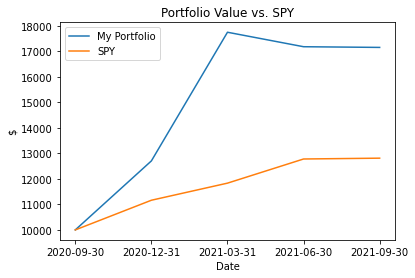

In [433]:
print(portfolio_test['Symbol'].unique())
plt.plot(SPY['Date'], portfolio_val['Portfolio_Total'], label = 'My Portfolio')
plt.plot(SPY['Date'], SPY['SPY_Total'], label = 'SPY')
plt.legend()
plt.xlabel('Date')
plt.ylabel('$')
plt.title('Portfolio Value vs. SPY')
plt.show()

In [ ]:
#








# test selling stocks if price is predicted to decrease
test2 = new_df[new_df['percentChangePredicted'] < -10]
potential_profit = (test2['nextQuarterPrice'] - test2['currentQuarterPrice']).sum()
total_invested = test2['currentQuarterPrice'].sum()
potential_revenue = test2['nextQuarterPrice'].sum()
print('Total Invested                    : $', total_invested)
print('Potential Profit/Loss if not sold : $', potential_profit)
print('Portfolio if not sold             : $', potential_revenue)
print('Potential Percent change          :', ((potential_revenue - total_invested) / total_invested) * 100)











#

In [106]:
# find which encoded value is predicted
predicted = model.predict(X_test)
#predicted.argmax(axis = 1)
predicted
#y_test
predicted[:,0]
test = pd.DataFrame({'symbol': historical_data.loc[X_test.index]['Symbol'], 'predicted': predicted[:,0], 'actual': y_test})
test['difference'] = (abs(test['predicted'] - test['actual']) / ((test['predicted'] + test['actual']) / 2)) * 100

test[test['difference'] < 1.5]

,symbol,predicted,actual,difference
3912,GPC,100.872826,100.43,0.439960
2218,CMCSA,38.998890,38.92,0.202492
5278,LMT,266.910461,267.60,0.258008
4262,HON,152.343185,153.36,0.665230
7961,TDY,314.106934,310.95,1.010127
...,...,...,...,...
4224,HLT,61.706390,61.85,0.232460
6464,PCAR,91.877258,92.92,1.128525
1585,KMX,66.737198,67.15,0.616642
8103,TT,131.104797,132.92,1.375024


In [50]:
# find which X_test rows were predicted correctly
y_test.argmax(axis = 1)
nn = pd.DataFrame({'predicted': predicted.argmax(axis = 1), 'actual': y_test.argmax(axis = 1)})
X_test.iloc[nn[nn['predicted'] == nn['actual']].index]

,currentNetReceivables,currentAccountsPayable,capitalLeaseObligations,totalShareholderEquity,commonStock,operatingCashflow,depreciationDepletionAndAmortization,capitalExpenditures,profitLoss,paymentsForRepurchaseOfCommonStock,...,operatingExpenses,nonInterestIncome,depreciationAndAmortization,incomeBeforeTax,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,currentQuarterPrice
4771,1.842842e-02,-2.109425e-01,-2.572194e-17,-0.295145,-0.202025,-0.136591,-0.344664,-0.345437,-0.192992,-2.654643e-01,...,-0.287523,-0.061638,-3.645696e-01,-0.192118,-0.191427,-0.162813,-0.211031,-0.224964,-0.184875,-0.215519
3205,-2.644700e-17,-2.146006e-17,-3.178971e-01,-0.286279,-0.216853,-0.177661,-0.241022,-0.370034,-0.266073,-2.654643e-01,...,-0.407933,-0.317008,-2.010106e-01,-0.283230,-0.242310,-0.254011,-0.229554,-0.253456,-0.260392,0.631585
7168,-2.644700e-17,-2.146006e-17,-2.972940e-01,-0.169874,1.344161,-0.160971,-0.188449,-0.215725,-0.261384,-1.355308e-18,...,-0.402491,-0.348904,-1.187793e-01,-0.277878,-0.145950,-0.249623,-0.212589,-0.225203,-0.252700,-0.318989
2237,-2.644700e-17,-2.146006e-17,-2.572194e-17,-0.235431,-0.086884,-0.161731,-0.368479,-0.371617,-0.216909,-1.651523e-01,...,-0.330927,-0.324583,-3.532538e-01,-0.196621,-0.481309,-0.190705,-0.174783,-0.223154,-0.205617,-0.262796
3088,-2.949589e-01,-1.379961e-01,-3.425571e-01,-0.234390,-0.216563,-0.100485,0.007535,0.570390,-0.195423,-2.654643e-01,...,0.325693,-0.113741,1.877720e-01,-0.339813,-0.183121,-0.203911,-0.224802,-0.188416,-0.184631,-0.231918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,-1.094871e-01,-2.041004e-01,-1.603285e-01,-0.294607,-0.175619,-0.130546,-0.314899,-0.283737,-1.263033,-2.584641e-01,...,-0.171679,-0.112249,-3.165667e-01,-1.180949,-0.228466,-1.194699,-0.211661,-0.814481,-1.310225,0.251323
6176,-3.684883e-01,-3.154383e-01,-2.572194e-17,-0.340843,-0.216478,-0.125164,-0.215377,-0.064185,-0.213020,-2.622889e-01,...,-0.073279,-0.348904,-1.608988e-01,-0.183668,-0.197319,-0.192706,-0.151780,-0.170637,-0.201511,-0.465032
5378,-2.236010e-01,-1.640358e-01,-2.572194e-17,-0.130127,-0.110121,-0.175020,0.320103,0.151314,-0.525185,-2.654643e-01,...,-0.247926,-0.351283,-2.424509e-17,-0.519379,-0.503611,-0.581308,-0.361298,-0.436880,-0.602363,-0.506870
8775,-6.568356e-02,-1.498096e-01,-2.572194e-17,-0.253019,-0.216170,0.014790,0.168400,0.018851,-0.147570,-8.504702e-02,...,-0.283416,0.026121,4.393902e-01,-0.131220,-0.144512,-0.118300,-0.052738,-0.041827,-0.132402,0.010684


In [45]:
# look at actual values of predicted
Y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [66]:
# Random forest
forest = RandomForestClassifier(n_estimators = 25, criterion = 'entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25)

In [67]:
# prediction of random forest
predictions = forest.predict(X_test)
total = 0
for x in range(len(predictions)):
    if np.array_equal(predictions[x], y_test[x]):
        total += 1
total / len(predictions)

0.6088094199738334

In [51]:
test = pd.DataFrame({'A': [1, 2, -1, 0, .1], 'percentChange': [3, -1, 5, 0, .1]})
test['inc_or_dec'] = [1 if x > 0 else 0 if x == 0 else -1 for x in test['percentChange']]
test

,A,percentChange,inc_or_dec
0,1.0,3.0,1
1,2.0,-1.0,-1
2,-1.0,5.0,1
3,0.0,0.0,0
4,0.1,0.1,1


In [52]:
historical_data.to_csv("historical_data.csv")

In [9]:
historical_data = historical_data.set_index(['Symbol', 'fiscalDateEnding'])
historical_data

reportedCurrency_x  totalAssets totalCurrentAssets  \
Symbol fiscalDateEnding                                                      
MMM    2021-09-30                      USD  48278000000        16426000000   
       2021-06-30                      USD  48307000000        16343000000   
       2021-03-31                      USD  47180000000        15345000000   
       2020-12-31                      USD  47344000000        14982000000   
       2020-09-30                      USD  45390000000        14110000000   
...                                    ...          ...                ...   
ZTS    2017-12-31                      USD   8586000000         4217000000   
       2017-09-30                      USD   9288000000         4894000000   
       2017-06-30                      USD   7802000000         3584000000   
       2017-03-31                      USD   7649000000         3383000000   
       2016-12-31                      USD   7649000000         3390000000   

                        cashAndCashEquivalentsAtCarryingValue  \
Symbol fiscalDateEnding                                         
MMM    2021-09-30                                  4878000000   
       2021-06-30                                  4695000000   
       2021-03-31                                  4636000000   
       2020-12-31                                  4634000000   
       2020-09-30                                  4121000000   
...                                                       ...   
ZTS    2017-12-31                                  1564000000   
       2017-09-30                                  1981000000   
       2017-06-30                                   705000000   
       2017-03-31                                   629000000   
       2016-12-31                                   727000000   

                        cashAndShortTermInvestments   inventory  \
Symbol fiscalDateEnding                                           
MMM    2021-09-30                        4878000000  4950000000   
       2021-06-30                         805000000  4842000000   
       2021-03-31                         501000000  4458000000   
       2020-12-31                         404000000  4239000000   
       2020-09-30                         440000000  3984000000   
...                                             ...         ...   
ZTS    2017-12-31                        1564000000  1427000000   
       2017-09-30                        1981000000  1490000000   
       2017-06-30                         705000000  1498000000   
       2017-03-31                         629000000  1535000000   
       2016-12-31                         727000000  1502000000   

                        currentNetReceivables totalNonCurrentAssets  \
Symbol fiscalDateEnding                                               
MMM    2021-09-30                  4916000000           31852000000   
       2021-06-30                  4991000000           31995000000   
       2021-03-31                  4817000000           31866000000   
       2020-12-31                  4705000000           34027000000   
       2020-09-30                  4623000000           31314000000   
...                                       ...                   ...   
ZTS    2017-12-31                  1060000000            4289000000   
       2017-09-30                        None            4394000000   
       2017-06-30                        None            4218000000   
       2017-03-31                        None            4266000000   
       2016-12-31                   962000000            4163000000   

                        propertyPlantEquipment  \
Symbol fiscalDateEnding                          
MMM    2021-09-30                   9323000000   
       2021-06-30                   9358000000   
       2021-03-31                   9240000000   
       2020-12-31                   9421000000   
       2020-09-30                   9216000000   
...              

In [24]:
monthly_prices[monthly_prices['Symbol'] == 'MMM']

,Date,open,high,low,close,volume,Symbol
0,2022-01-21,178.32,181.780,172.5600,172.65,34039389,MMM
1,2021-12-31,172.55,179.180,169.1801,177.63,48251474,MMM
2,2021-11-30,178.53,186.300,169.9400,170.04,47872133,MMM
3,2021-10-29,176.25,183.820,173.7800,178.68,48241875,MMM
4,2021-09-30,194.55,195.606,175.3700,175.42,67366254,MMM
...,...,...,...,...,...,...,...
261,2000-04-28,89.38,98.310,85.3100,86.63,34480000,MMM
262,2000-03-31,87.19,94.630,78.1900,88.56,43561100,MMM
263,2000-02-29,94.38,96.190,81.3100,88.19,33435200,MMM
264,2000-01-31,96.06,103.800,90.2500,93.63,34253500,MMM
